# Visualising Input Reconstruction

Here's a plan:
* We need to visualise the input - as a 1D bar similar to our previous visualisations (VPU visualiser). We need this displayed in real time.
* We also need to visualise the predictions over time - it would be good to plot on the same graph as the input to compare so maybe we do make this a line graph. 
* We want to plot the different sums of predictions across different stacks - we should be more accurate as the stacks increase.
* We might also want some comparison over time - the input, reconstructions and errors as 2D plots.

See 

https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html
https://python-graph-gallery.com/122-multiple-lines-chart/

We also need to sort the mean - this maybe done on the sensor side.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from src.var_processor.sensor import Sensor
from src.sources.fft import FFTSource

Start by creating an audio FFT sensor source.

See here for additional materials - http://localhost:8888/notebooks/2020-03-22%20-%20Visualising%20Causes.ipynb.

In [3]:
audio = FFTSource(res_factor=2)
sensor = Sensor(audio, 4)

In [4]:
sensor.get_data_length()

256

In [5]:
_, initial_frame = sensor.source.read()

In [6]:
initial_frame.shape

(274,)

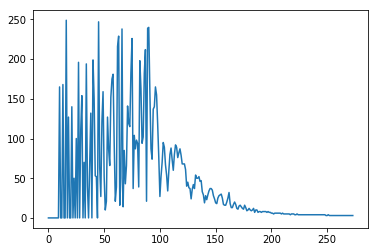

In [7]:
plt.plot(initial_frame)

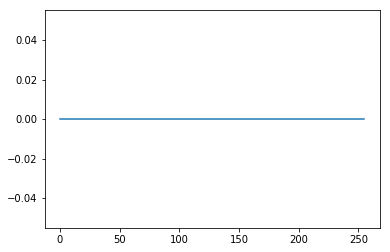

In [8]:
plt.plot(sensor.mean)

In [9]:
sensor.count

0

In [10]:
not sensor.signal_mean.all()

True

In [11]:
sensor.mean.T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [12]:
self = sensor
_, initial_frame = self.source.read()
initial_frame.dtype

dtype('uint8')

In [13]:
for _ in range(0, 500):
    frame = sensor.get_frame()

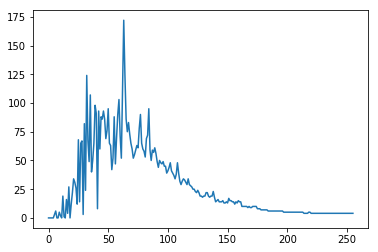

In [14]:
plt.plot(sensor.mean)

In [15]:
from src.var_processor.sensor import resize

flattened = initial_frame.reshape(-1, 1)
# Resize to nearest power of vec_len
output = resize(flattened, self.power_len)
print(output.dtype, flattened.dtype)

float64 uint8


In [16]:
frame.T

array([[ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,
         0,  1, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,
         1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, 

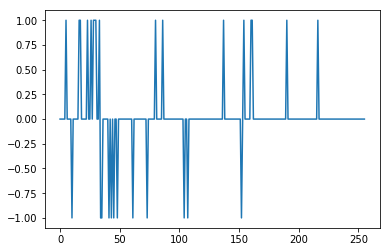

In [17]:
plt.plot(frame)

So when visualising, we can have:
* input data;
* mean;
* reconstructions.

Let'f first convert our stack wrapper into a sheet class that implements a plurality of stacks.

We could generate an abstract class that has the shared interfaces, then keep expanding this.

## Class Recap

We have the following data structures:
* Covariance
* Power Iterator
* VPU
* Stage
* Stack
* Sheet
* Sensor

In [18]:
from src.var_processor.sheet import Sheet

In [19]:
test = np.zeros(shape=(20, 4, 25))
addition = np.ones(shape=(20, 4))
test[:, :, 15] = addition
test[..., 15]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [20]:
test[:, 3, :].mean(axis=1).shape

(20,)

In [21]:
test[:, 3, :].mean(axis=1)

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])

We can use this example here to cycle through plot styles - https://matplotlib.org/examples/color/color_cycle_demo.html. Or here - the later reply with two examples is good.
https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
```
color=iter(cm.rainbow(np.linspace(0,1,n)))
for i in range(n):
   c=next(color)
   plt.plot(x, y,c=c)
```

In [22]:
sums = test.sum(axis=2); print(sums)
sums_list = list(sums.T); print(len(sums_list))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
4


In [23]:
sums.shape, list(range(0, sums.shape[1]))

((20, 4), [0, 1, 2, 3])

In [24]:
sums[:, 0:3].sum(axis=1).shape, sums[:, 0:3].sum(axis=1)

((20,),
 array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3.]))

In [25]:
totals = list()
for i in range(0, sums.shape[1]):
    totals.append(sums[:, 0:i+1].sum(axis=1))

In [26]:
totals = [sums[:, 0:i+1].sum(axis=1) for i in range(0, sums.shape[1])]

In [27]:
import time
from matplotlib.pyplot import cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from src.var_processor.sheet import Sheet

In [28]:
cm.rainbow(np.linspace(0, 1, 4+2)).shape

(6, 4)

In [29]:
for color in cm.rainbow(np.linspace(0, 1, 4+2)):
    print(color)

[0.5 0.  1.  1. ]
[0.1        0.58778525 0.95105652 1.        ]
[0.3        0.95105652 0.80901699 1.        ]
[0.7        0.95105652 0.58778525 1.        ]
[1.         0.58778525 0.30901699 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


In [30]:
class SheetVisualizer:
    """Object to visualise a set of stacks."""

    def __init__(self, sheet, sensor, buf_length=127):
        """Initialise.

        Args:
            sheet: a sheet object.
            sensor: a sensor object.
        """
        assert isinstance(sheet, Sheet)
        assert isinstance(sensor, Sensor)
        self.sheet = sheet
        self.sensor = sensor
        self.buf_length = buf_length
        # Start sensor if not started
        if not self.sensor.source.started:
            self.sensor.start()
        # Initialise single subplot
        self.figure, self.ax = plt.subplots()
        # Initialising animation
        self.animation = FuncAnimation(
            self.figure, self.update, save_count=200)
        # Initialise X Axis
        self.x_range = np.arange(0, sheet.input_len)
        # Set buffer for inputs
        self.input_buffers = np.zeros(
            shape=(sheet.input_len, sheet.stack_len, self.buf_length),
            dtype=np.int8
        )
        # Set count
        self.count = 0
        # Initialise Labels, Colors and Linestyles
        self.labels = ["Raw Input", "Sensor Mean"]
        self.labels = self.labels + [f"Input for Stack {i}" for i in range(0, self.sheet.stack_len)]
        self.colors = cm.rainbow(np.linspace(0, 1, self.sheet.stack_len+2))
        self.linestyles = ["-", "--", ":", ":", ":", ":"]
        # Initialise Data Plots
        # Set variable to store lines to update
        self.lines = [None for i in range(0, self.sheet.stack_len+2)]                         
        # Start with blank data                         
        zero_y = np.zeros(shape=(sheet.stack_len+2, sheet.input_len))
        self.set_plots(zero_y)  
        # Add legend
        self.ax.legend()
        self.ax.set_ylim(0, 256)

    def set_plots(self, y_data):
        """Plot one or more lines on an axis.
    
        Args:
            y_data - list of 1D numpy arrays for y.
        """
        for i, y in enumerate(y_data):
            if self.lines[i] is None:
                self.lines[i], = self.ax.plot(
                    self.x_range,
                    y,
                    color=self.colors[i],
                    label=self.labels[i],
                    linestyle=self.linestyles[i]
                )
            else:
                self.lines[i].set_ydata(y)                             
                                 
    def update(self, frame):
        """Update the visualisations."""
        # Get mean-removed input data
        input_data, raw_frame = self.sensor.get_frame_plus_raw()
        causes, stack_inputs = self.sheet.iterate(input_data)
        self.input_buffers[:, :, self.count] = stack_inputs
        # Sum across samples in buffer
        sums = self.input_buffers.sum(axis=2).astype(np.int16)
        # Get mean and mean multiplier for reconstruction
        mean = self.sensor.mean
        mean_min = np.minimum(mean, 255-mean)
        # Total across more and more stacks for each reconstruction
        totals = [
            mean + (sums[:, 0:i+1].sum(axis=1).reshape(-1, 1)*mean_min)//127 
            for i in range(0, sums.shape[1])
        ]
        # Get y_data as list
        y_data = [raw_frame, mean] + totals
        # Update plots
        self.set_plots(y_data)
        # Increment Count and wrap if necessary
        self.count = (self.count + 1) % self.buf_length
        # time.sleep(0.25)
        return self.figure

    def show(self):
        """Show the visualisations."""
        plt.show()

We need to use set_data for the ydata.

We also need to multiply by the mean and add the mean back to our estimates

<IPython.core.display.Javascript object>


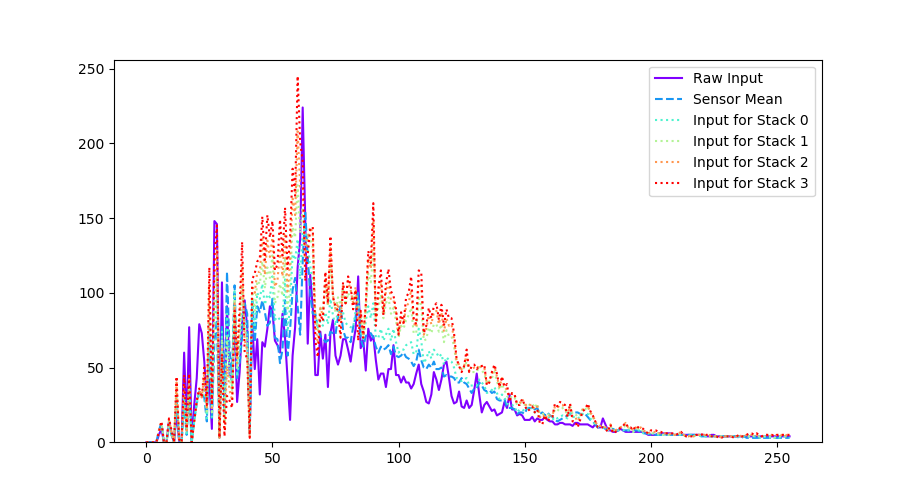

In [31]:
%matplotlib notebook
sheet = Sheet(4, 256)
sheet_vis = SheetVisualizer(sheet, sensor)
sheet_vis.show()

The visualisation now works but is quite confusing!

Some initial observations:
* There is a time delay between the reconstructions.
* The reconstructions are stacked - later stacks tend to add to earlier ones rather than correct for them.
* Part of the specialness is in the reconstruction - just summing over time is not the only option and leads to predicting the past. It takes about 127 repetitions to adjust.
* But the underlying predictions are binary for any one time period.
* This is also closed loop prediction.
* Remember that the input for stack 1 is the residual; the input for stack 0 is the binary input.
* The lower causes are like low-resolution associations at a macro scale.
* You can get fairly close by just recording a mean of the signal - is this what the thalamus is doing?
* Each has different speeds - the mean is slow to respond and almost static.
* **Another plot with errors would be useful - raw_input - mean, raw_input - each of stack_inputs_reconstructions.**

Are there any spatial predictions across the spectrum - e.g. if a signal is seen in one set of frequencies does that lead to a prediction in another area?

In [ ]:
def plot_eigenvectors(stack, spacer_len=0):
        """Plot the eigenvectors in the stack.

        Args:
            spacer_len - integer setting a spacing between eigenvectors.
        """
        evs = stack.get_eigenvectors()
        # Define result arrays with extra spacing
        result_arrays = [
            np.zeros((stack.vec_len+spacer_len)*len(stage))
            for stage in evs]
        for result_array, stage_vpus in zip(result_arrays, evs):
            i = 0
            for vpu in stage_vpus:
                result_array[i:i+stack.vec_len] = vpu.ravel()
                i += stack.vec_len+spacer_len
        fig, axes = plt.subplots(len(evs), 1)
        for ax, result_array in zip(axes, result_arrays):
            ax.bar(np.arange(0, result_array.shape[0]), result_array)
            ax.set_xticks(
                np.arange(-0.5, result_array.shape[0], stack.vec_len+spacer_len)
            )
            ax.xaxis.grid(True)
            ax.set_xticklabels([])
        fig.subplots_adjust(hspace=0.2)
        plt.show()

In [ ]:
plot_eigenvectors(sheet_vis.sheet.stacks[0])

In [ ]:
plot_eigenvectors(sheet_vis.sheet.stacks[1])

In [ ]:
plot_eigenvectors(sheet_vis.sheet.stacks[2])

In [ ]:
self = sheet_vis
# Get mean-removed input data
input_data, raw_frame = self.sensor.get_frame_plus_raw()
causes, stack_inputs = self.sheet.iterate(input_data)
self.input_buffers[:, :, self.count] = stack_inputs
# Sum across samples in buffer
sums = self.input_buffers.sum(axis=2).astype(np.int32)
# Get mean and mean multiplier for reconstruction
mean = self.sensor.mean
mean_min = np.minimum(mean, 255-mean)
# Total across more and more stacks for each reconstruction
totals = [
        mean + (sums[:, 0:i+1].sum(axis=1).reshape(-1, 1)*mean_min)//127
        for i in range(0, sums.shape[1])
]
# Get y_data as list
y_data = [raw_frame, mean] + totals
# Update plots
self.set_plots(y_data)
# Increment Count and wrap if necessary
self.count = (self.count + 1) % self.buf_length

In [ ]:
input_data.T, raw_frame.T

So the input and the raw frame are being computed correctly but the mean isn't - it's set to 0

In [ ]:
self.sensor.sum.T

In [ ]:
self.sensor.signal_mean.T

In [ ]:
self.sensor.count

In [ ]:
(self.sensor.sum//self.sensor.count).T

In [ ]:
(self.sensor.sum//self.sensor.count).astype(np.uint8).T

In [ ]:
self.sensor.signal_mean.T

In [ ]:
mean_min.shape

In [ ]:
_, initial_frame = self.sensor.source.read()
flattened = initial_frame.reshape(-1, 1)
# Resize to nearest power of vec_len
output = resize(flattened, self.sensor.power_len).astype(np.uint8)
mean_2 = self.sensor.update_mean(output)

In [ ]:
output.T

In [ ]:
mean_2.T

In [ ]:
from src.var_processor.sensor import signal_adjust

signed = signal_adjust(output, mean_2)

In [ ]:
(output - mean_2).astype(np.int16).T

In [ ]:
mean_2.T

In [ ]:
signed.T

In [ ]:
(sums[:, 0:i+1].sum(axis=1)).shape

In [ ]:
(sums[:, 0:i+1].sum(axis=1)*mean_min).shape

In [ ]:
input_data, raw_frame = self.sensor.get_frame_plus_raw()
fig, ax = plt.subplots()
line, = ax.plot(raw_frame)

In [ ]:
totals = [
            mean + (sums[:, 0:i+1].sum(axis=1).reshape(-1, 1)*mean_min)//127 
            for i in range(0, sums.shape[1])
        ]

In [ ]:
(sums[:, 0:i+1].sum(axis=1).reshape(-1, 1)*mean_min).T

In [ ]:
sums[:, 0:3].sum(axis=1).reshape(-1, 1).T

The sums are zero! Why?

Input_data is zero.

In [ ]:
input_data, raw_frame = self.sensor.get_frame_plus_raw()

In [ ]:
input_data.T

In [ ]:
# Get frame and flatten to 1D array
_, initial_frame = self.sensor.source.read()
flattened = initial_frame.reshape(-1, 1)
# Resize to nearest power of vec_len
output = resize(flattened, self.sensor.power_len).astype(np.uint8)
mean = self.sensor.update_mean(output)
signed = signal_adjust(output, mean)

Below could all be tested by looking for non-zero values.

In [ ]:
initial_frame.T

In [ ]:
flattened.T

In [ ]:
output.T

In [ ]:
mean.T

In [ ]:
signed.T

So the issue is signal_adjust.

In [ ]:
signal_max = 255
signal = output
signal = signal.astype(np.int16)
mean = signal.astype(np.int16)
zero_mean = signal - mean
# Get signs
signs = np.sign(zero_mean)
# PBThreshold - outputs values {-1, 0, 1}
# We want symmetric mean for reconstruction
signal_max = np.minimum(mean, (signal_max - mean))
rand_vals = np.random.uniform(size=zero_mean.shape)*mean
binary_values = np.where(np.abs(zero_mean) > rand_vals, 1, 0)
# Re-add in signs
signed = binary_values*signs
signal_adjust_output = signed.astype(np.int8)

In [ ]:
signal.T

In [ ]:
mean.T

In [ ]:
zero_mean.T

Why is the signal equal to the mean! Goddamn copy and paste!